### load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

In [2]:
cf.go_offline()

In [207]:
data = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)

In [4]:
data.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### data EDA part3

### learning platform

In [48]:
platform = data.loc[:,'Q6_1':'Q6_12'][1:].count(axis=0).reset_index()

In [45]:
def get_platform(x):
    platform = data[1:].loc[:,x].unique()[1]
    return platform

In [50]:
platform['platform'] = platform['index'].apply(get_platform)

In [52]:
platform.drop('index', axis=1,inplace=True)

In [53]:
platform.columns = ['count', 'platform']

In [56]:
platform.dropna(inplace=True)

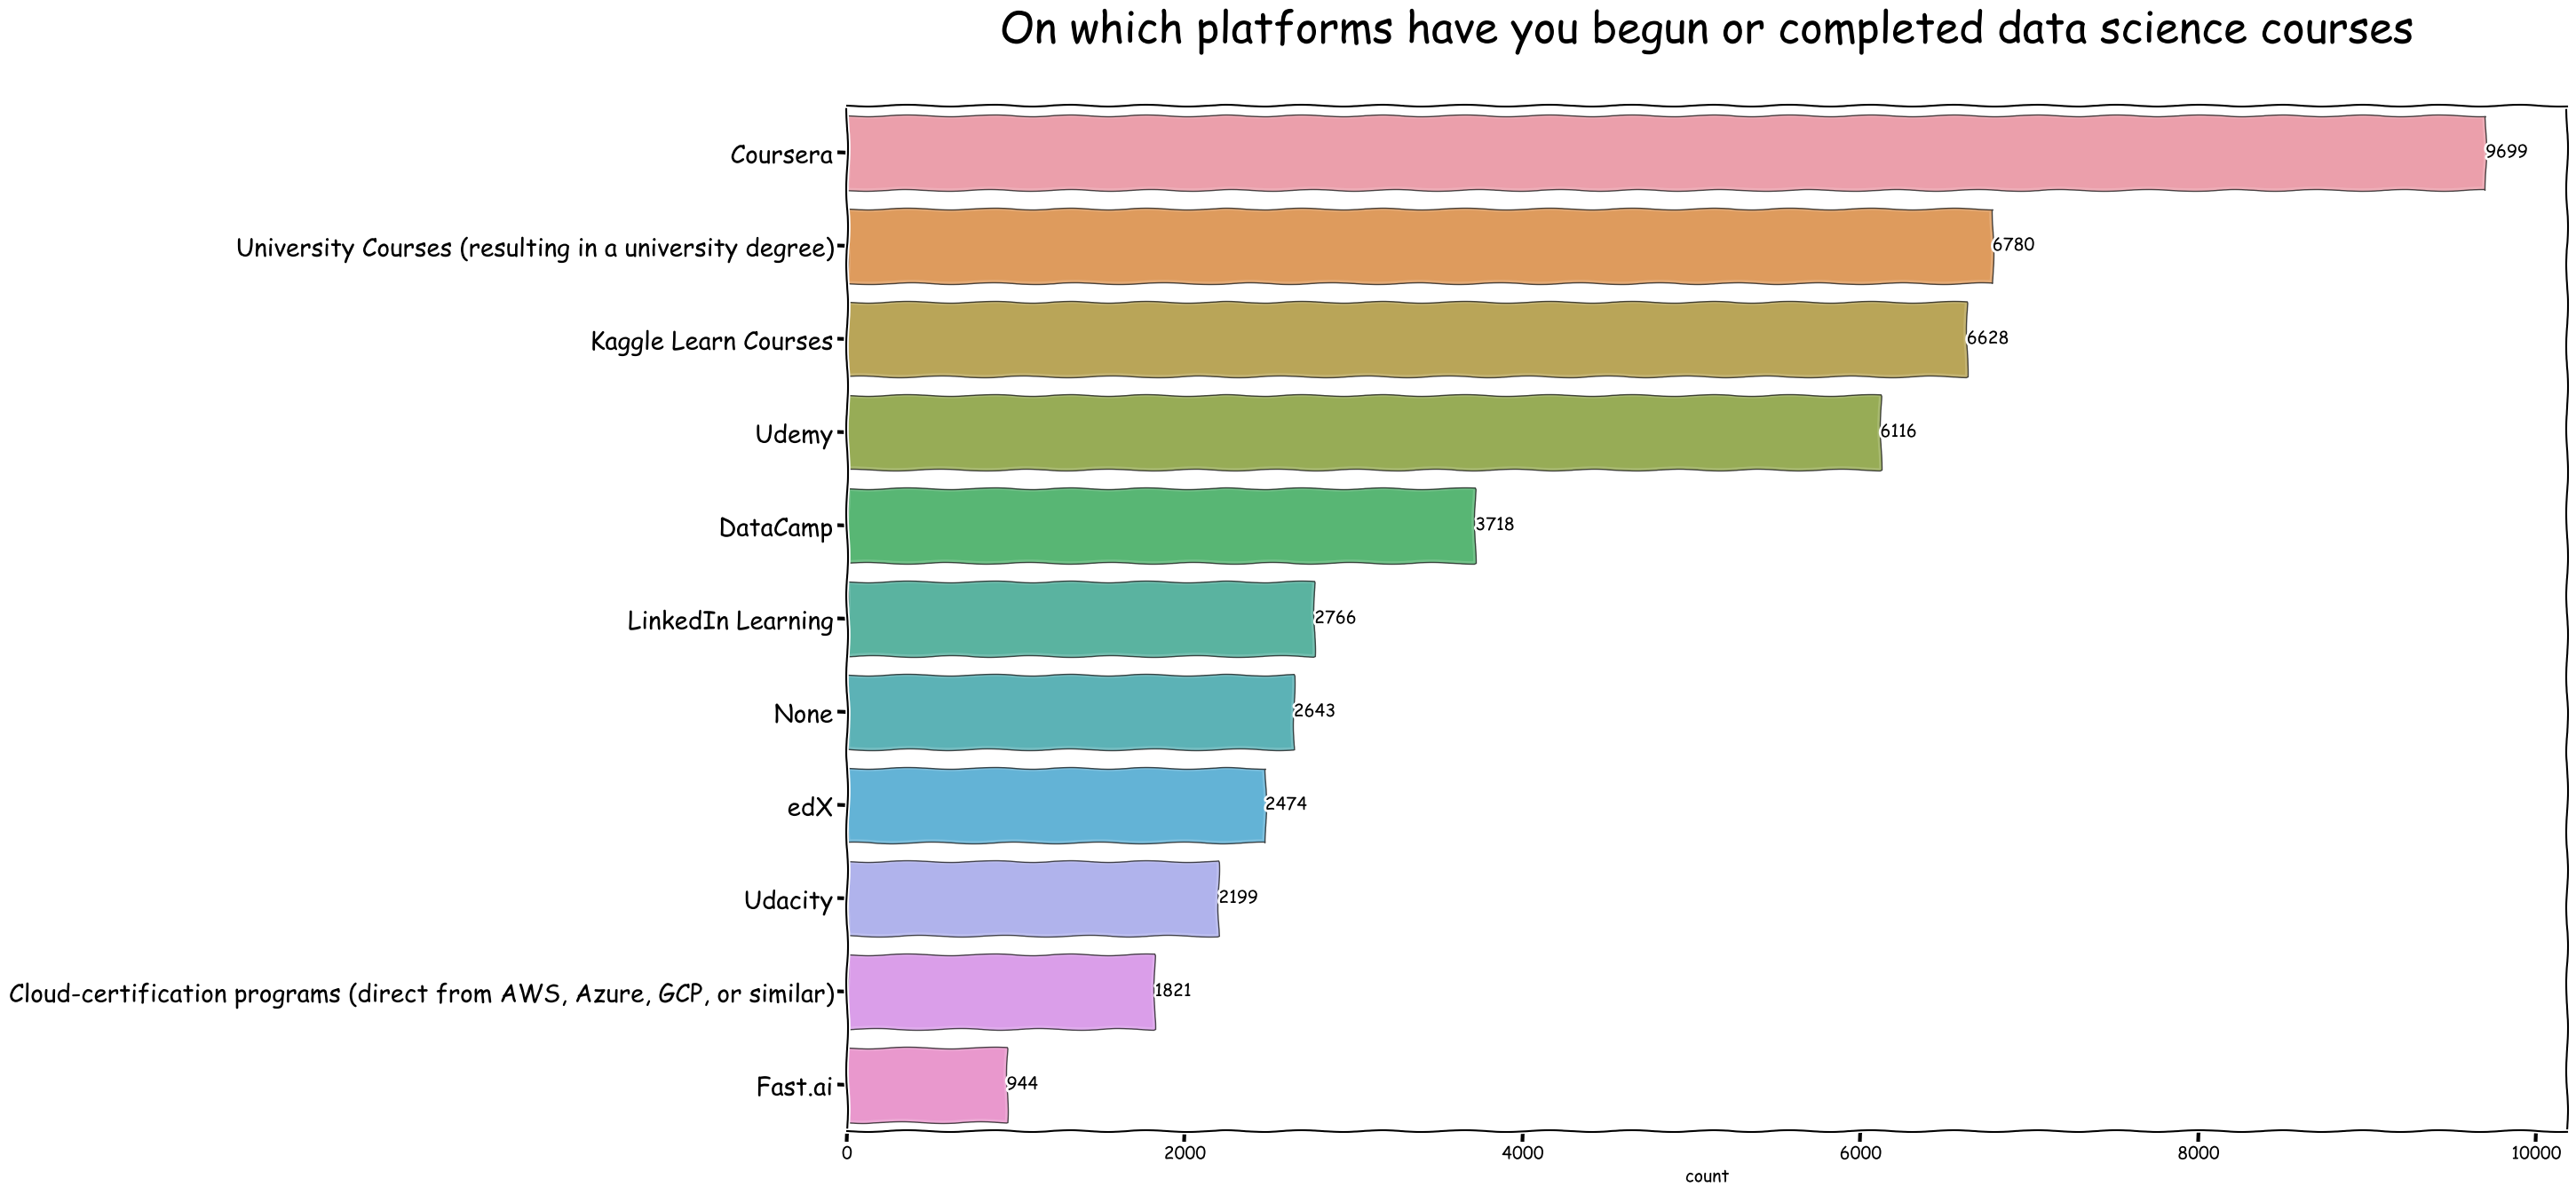

In [154]:
with plt.xkcd():
    sns.barplot(platform.sort_values('count', ascending=False), y='platform', x='count', edgecolor='black', alpha=0.7)
    fig = plt.gcf()
    fig.set_size_inches(25,15)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_size(20)
    plt.title('On which platforms have you begun or completed data science courses\n', size=35)

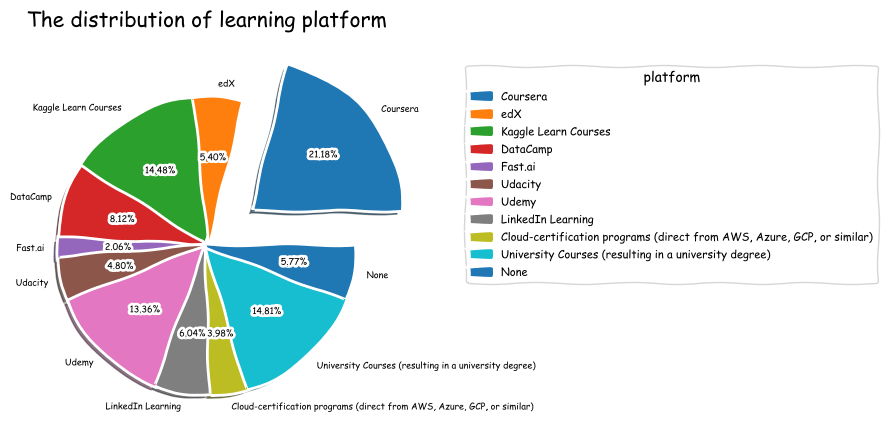

In [159]:
with plt.xkcd():
    plt.pie(platform['count'],labels= platform['platform'],textprops={'fontsize': 6.5, 'color':'black'},shadow=True,autopct='%1.2f%%',
           explode=[0.4,0,0,0,0,0,0,0,0,0,0])
    plt.legend(fontsize=8, loc = [1.2,0.4], title='platform',title_fontsize=10 )
    plt.title('The distribution of learning platform\n', size=15)

###  most helpful platform

In [170]:
helpful_platform = data.loc[:,'Q7_1':'Q7_7'][1:].count(axis=0).reset_index()

In [172]:
helpful_platform['helpful_platform'] = helpful_platform['index'].apply(get_platform)

In [176]:
helpful_platform.drop('index', axis=1, inplace=True)

In [177]:
helpful_platform.columns=['count', 'helpful_platform']

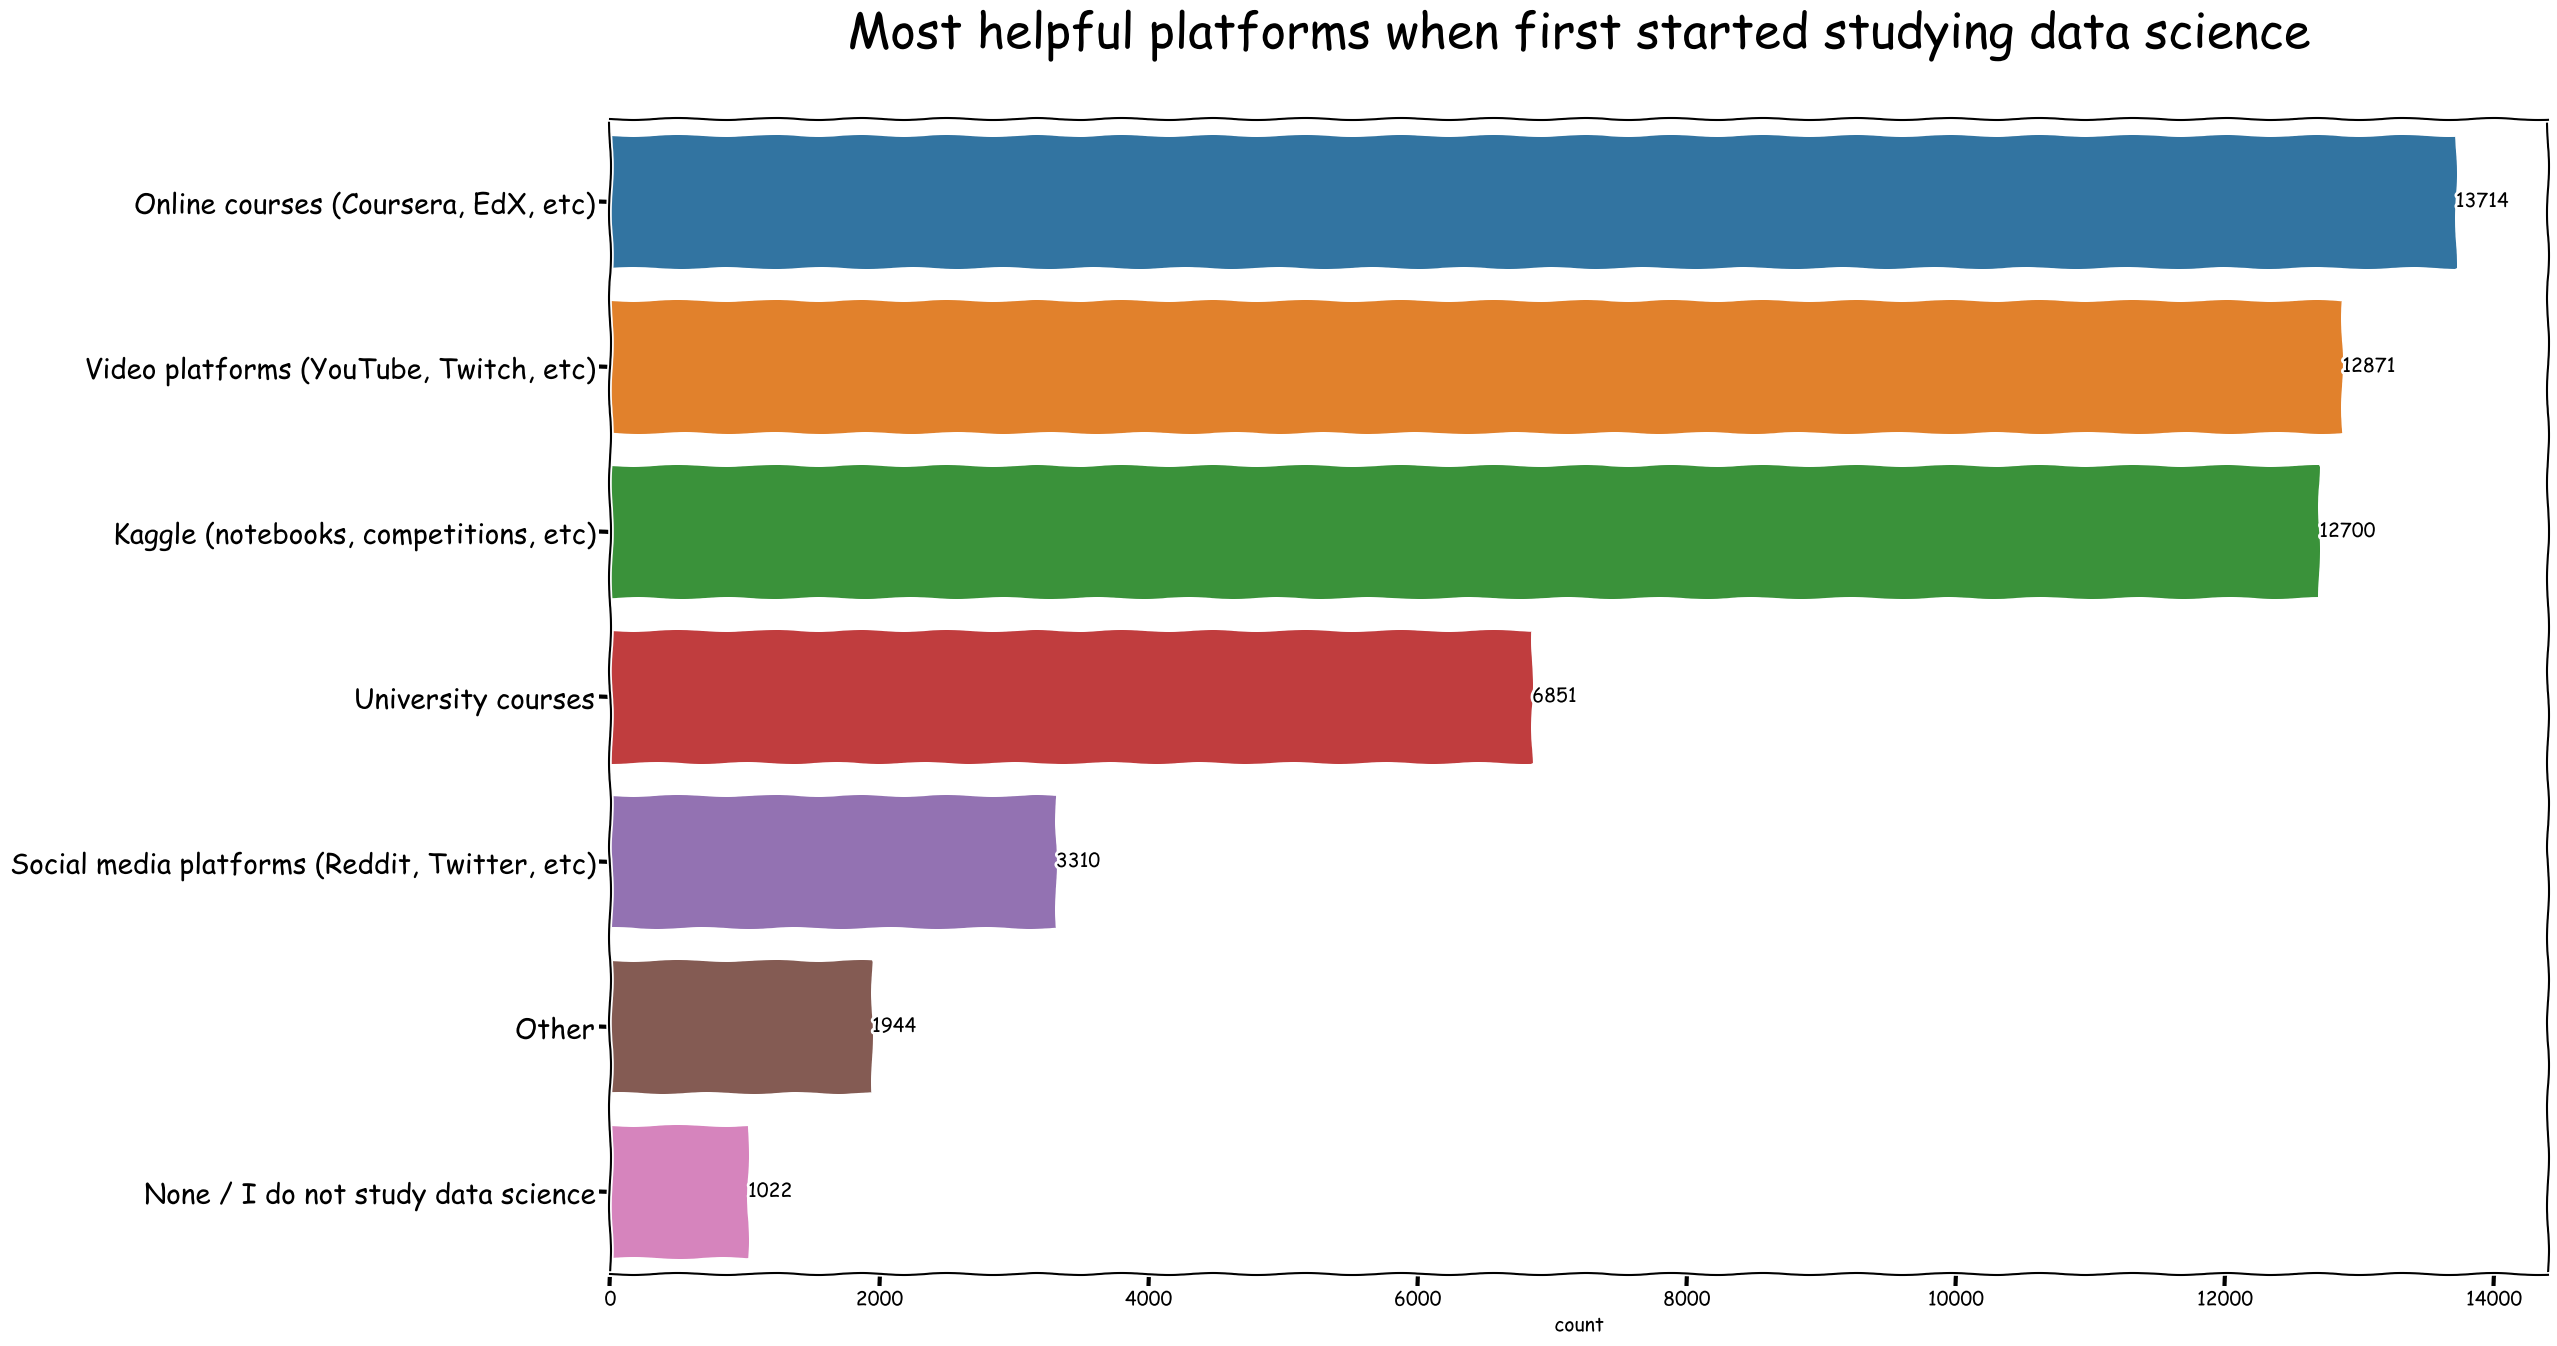

In [186]:
with plt.xkcd():
    sns.barplot(helpful_platform.sort_values('count', ascending=False), x='count', y='helpful_platform')
    fig = plt.gcf()
    fig.set_size_inches(25,15)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_size(20)
    plt.title('Most helpful platforms when first started studying data science\n', size=35)

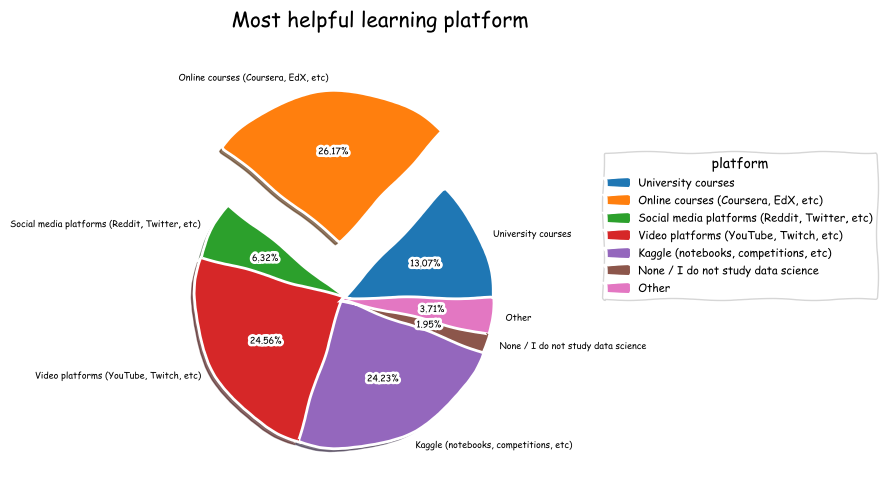

In [201]:
with plt.xkcd():
    plt.pie(helpful_platform['count'],labels= helpful_platform['helpful_platform'],textprops={'fontsize': 6.5, 'color':'black'},shadow=True,autopct='%1.2f%%',
           explode=[0,0.4,0,0,0,0,0])
    plt.legend(fontsize=8, loc = [1.2,0.5], title='platform',title_fontsize=10 )
    plt.title('Most helpful learning platform\n\n\n', size=15,loc='right')

### current job title 

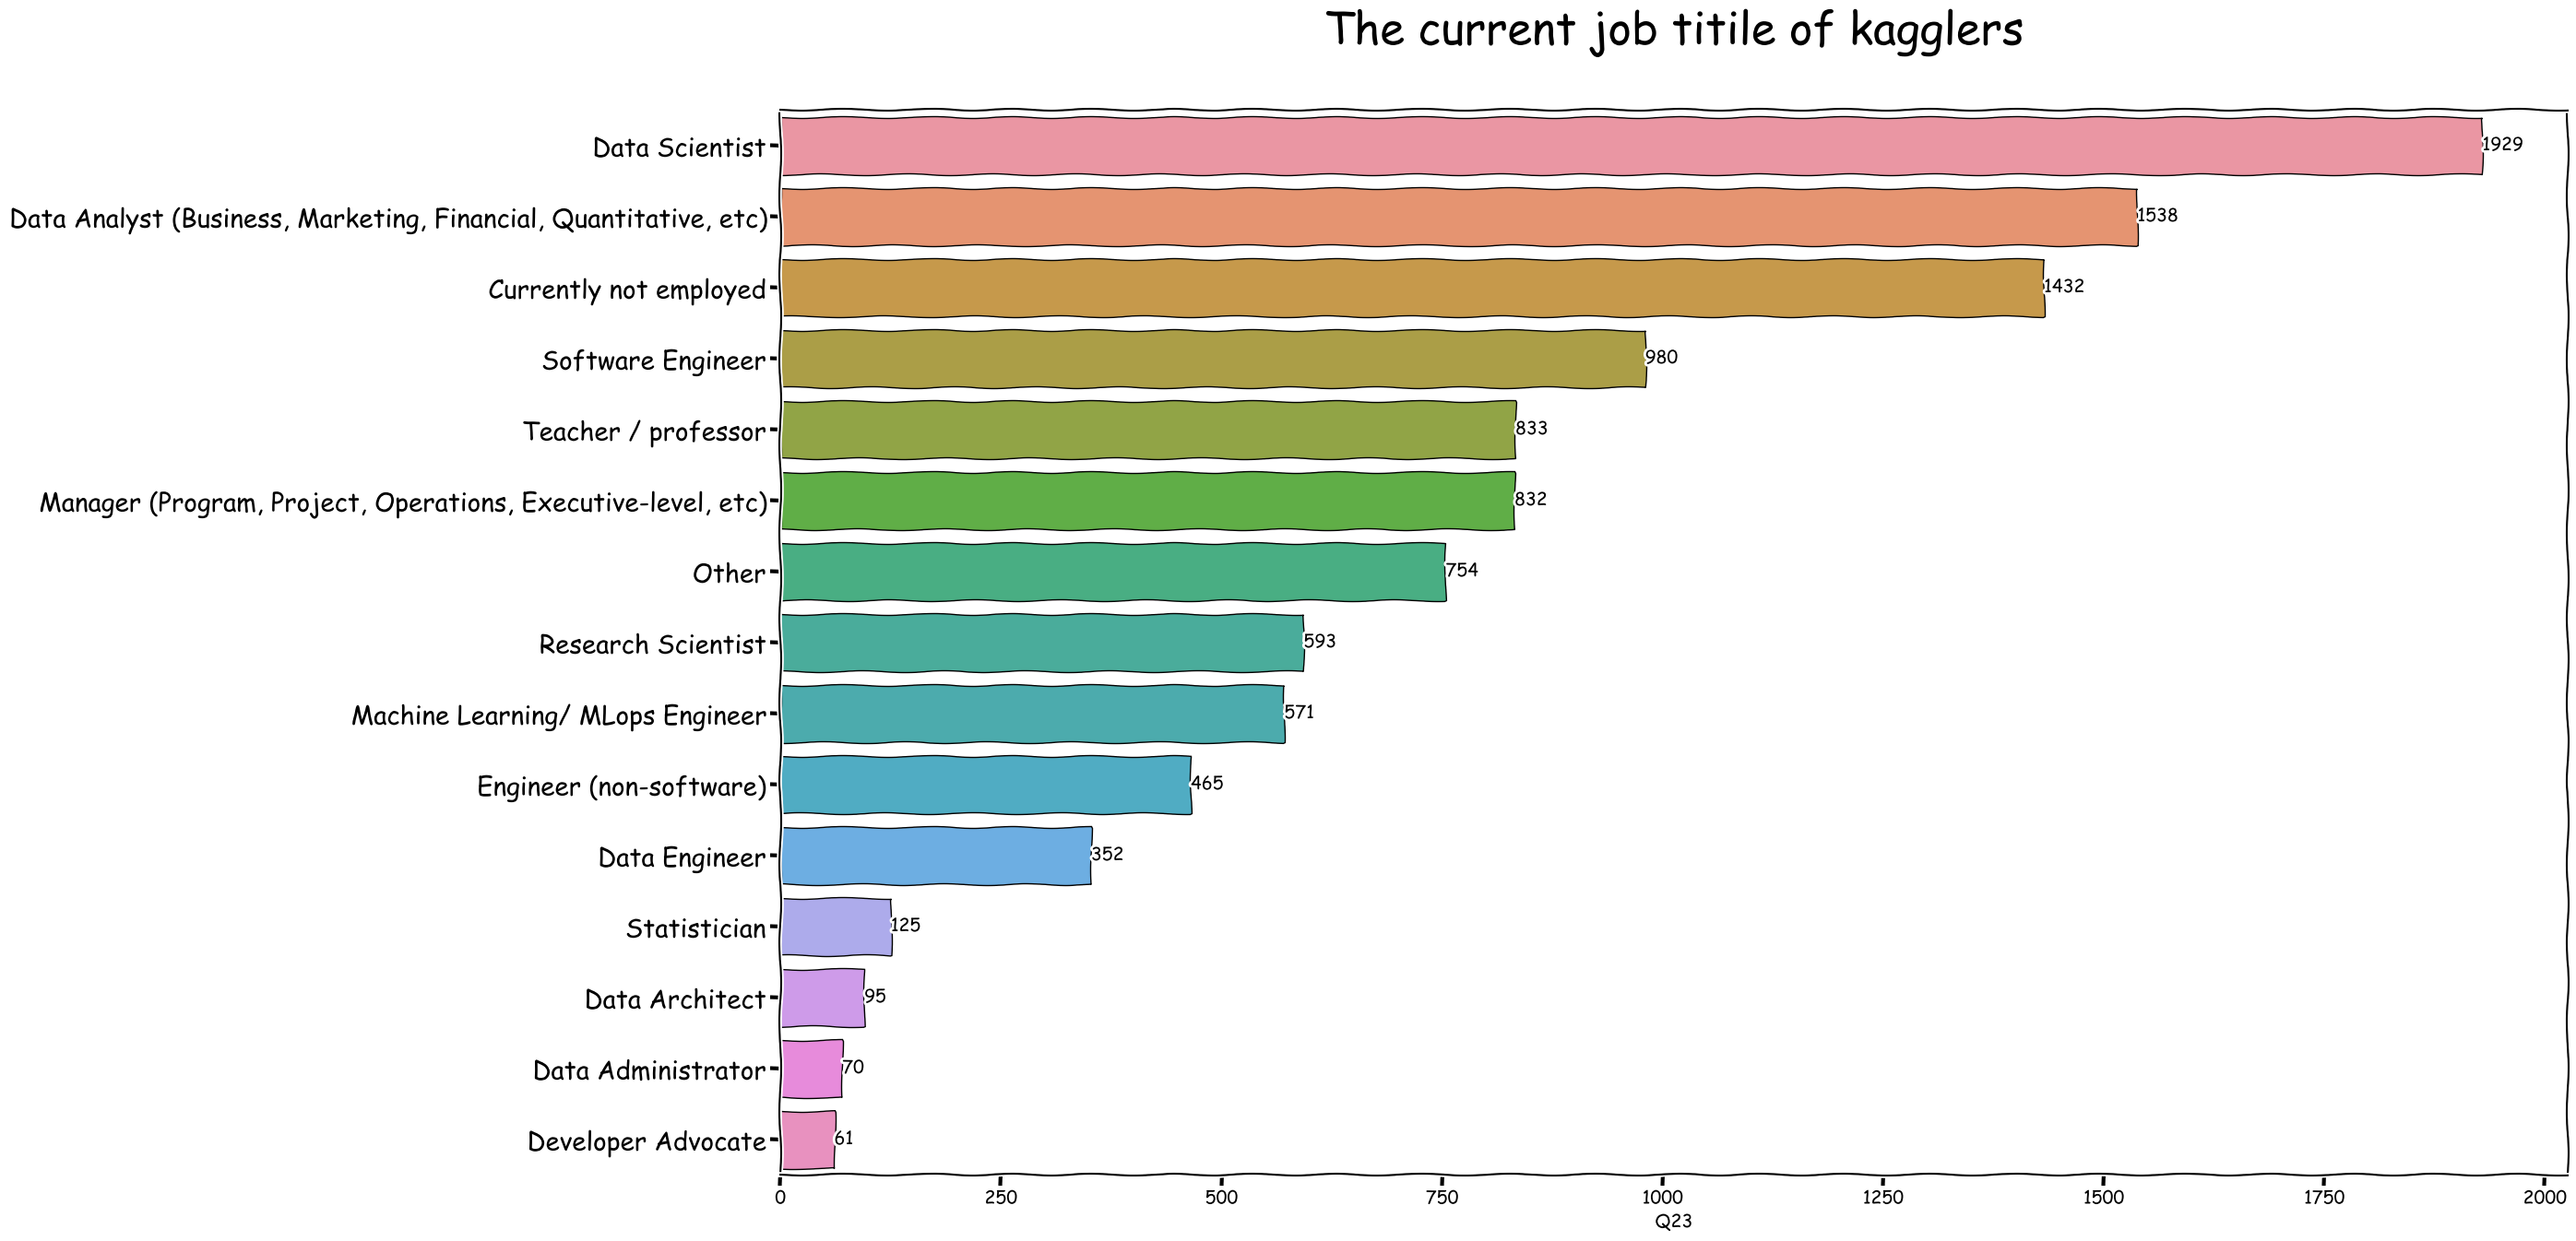

In [234]:
with plt.xkcd():
    sns.barplot(data.loc[:,'Q23'][1:].value_counts().reset_index(), x='Q23', y='index', edgecolor='black')
    fig = plt.gcf()
    fig.set_size_inches(25,15)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_size(20)
    plt.title('The current job titile of kagglers\n', size=35)

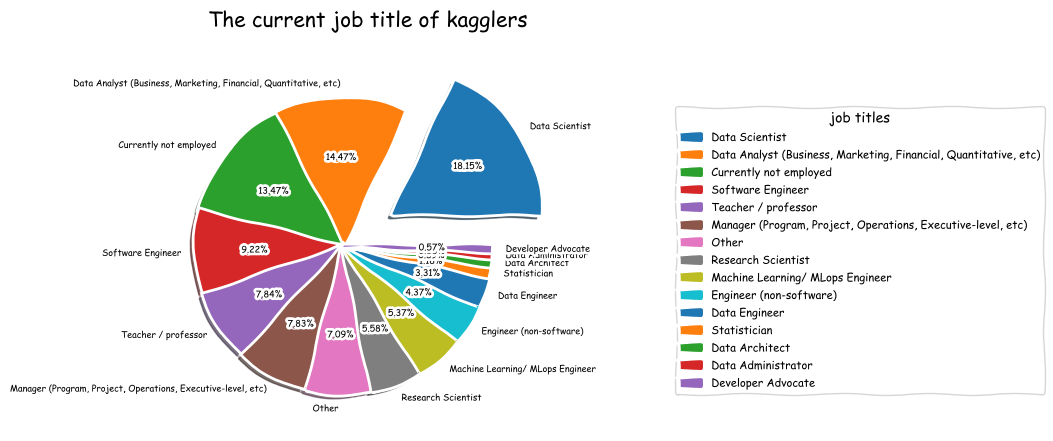

In [247]:
with plt.xkcd():
    plt.pie(data.loc[:,'Q23'][1:].value_counts().reset_index()['Q23'],labels= data.loc[:,'Q23'][1:].value_counts().reset_index()['index'],textprops={'fontsize': 6.5, 'color':'black'},shadow=True,autopct='%1.2f%%',
           explode=[0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    plt.legend(fontsize=8, loc = [1.4,0.1], title='job titles',title_fontsize=10 )
    plt.title('The current job title of kagglers\n', size=15,loc='right')

### working experience

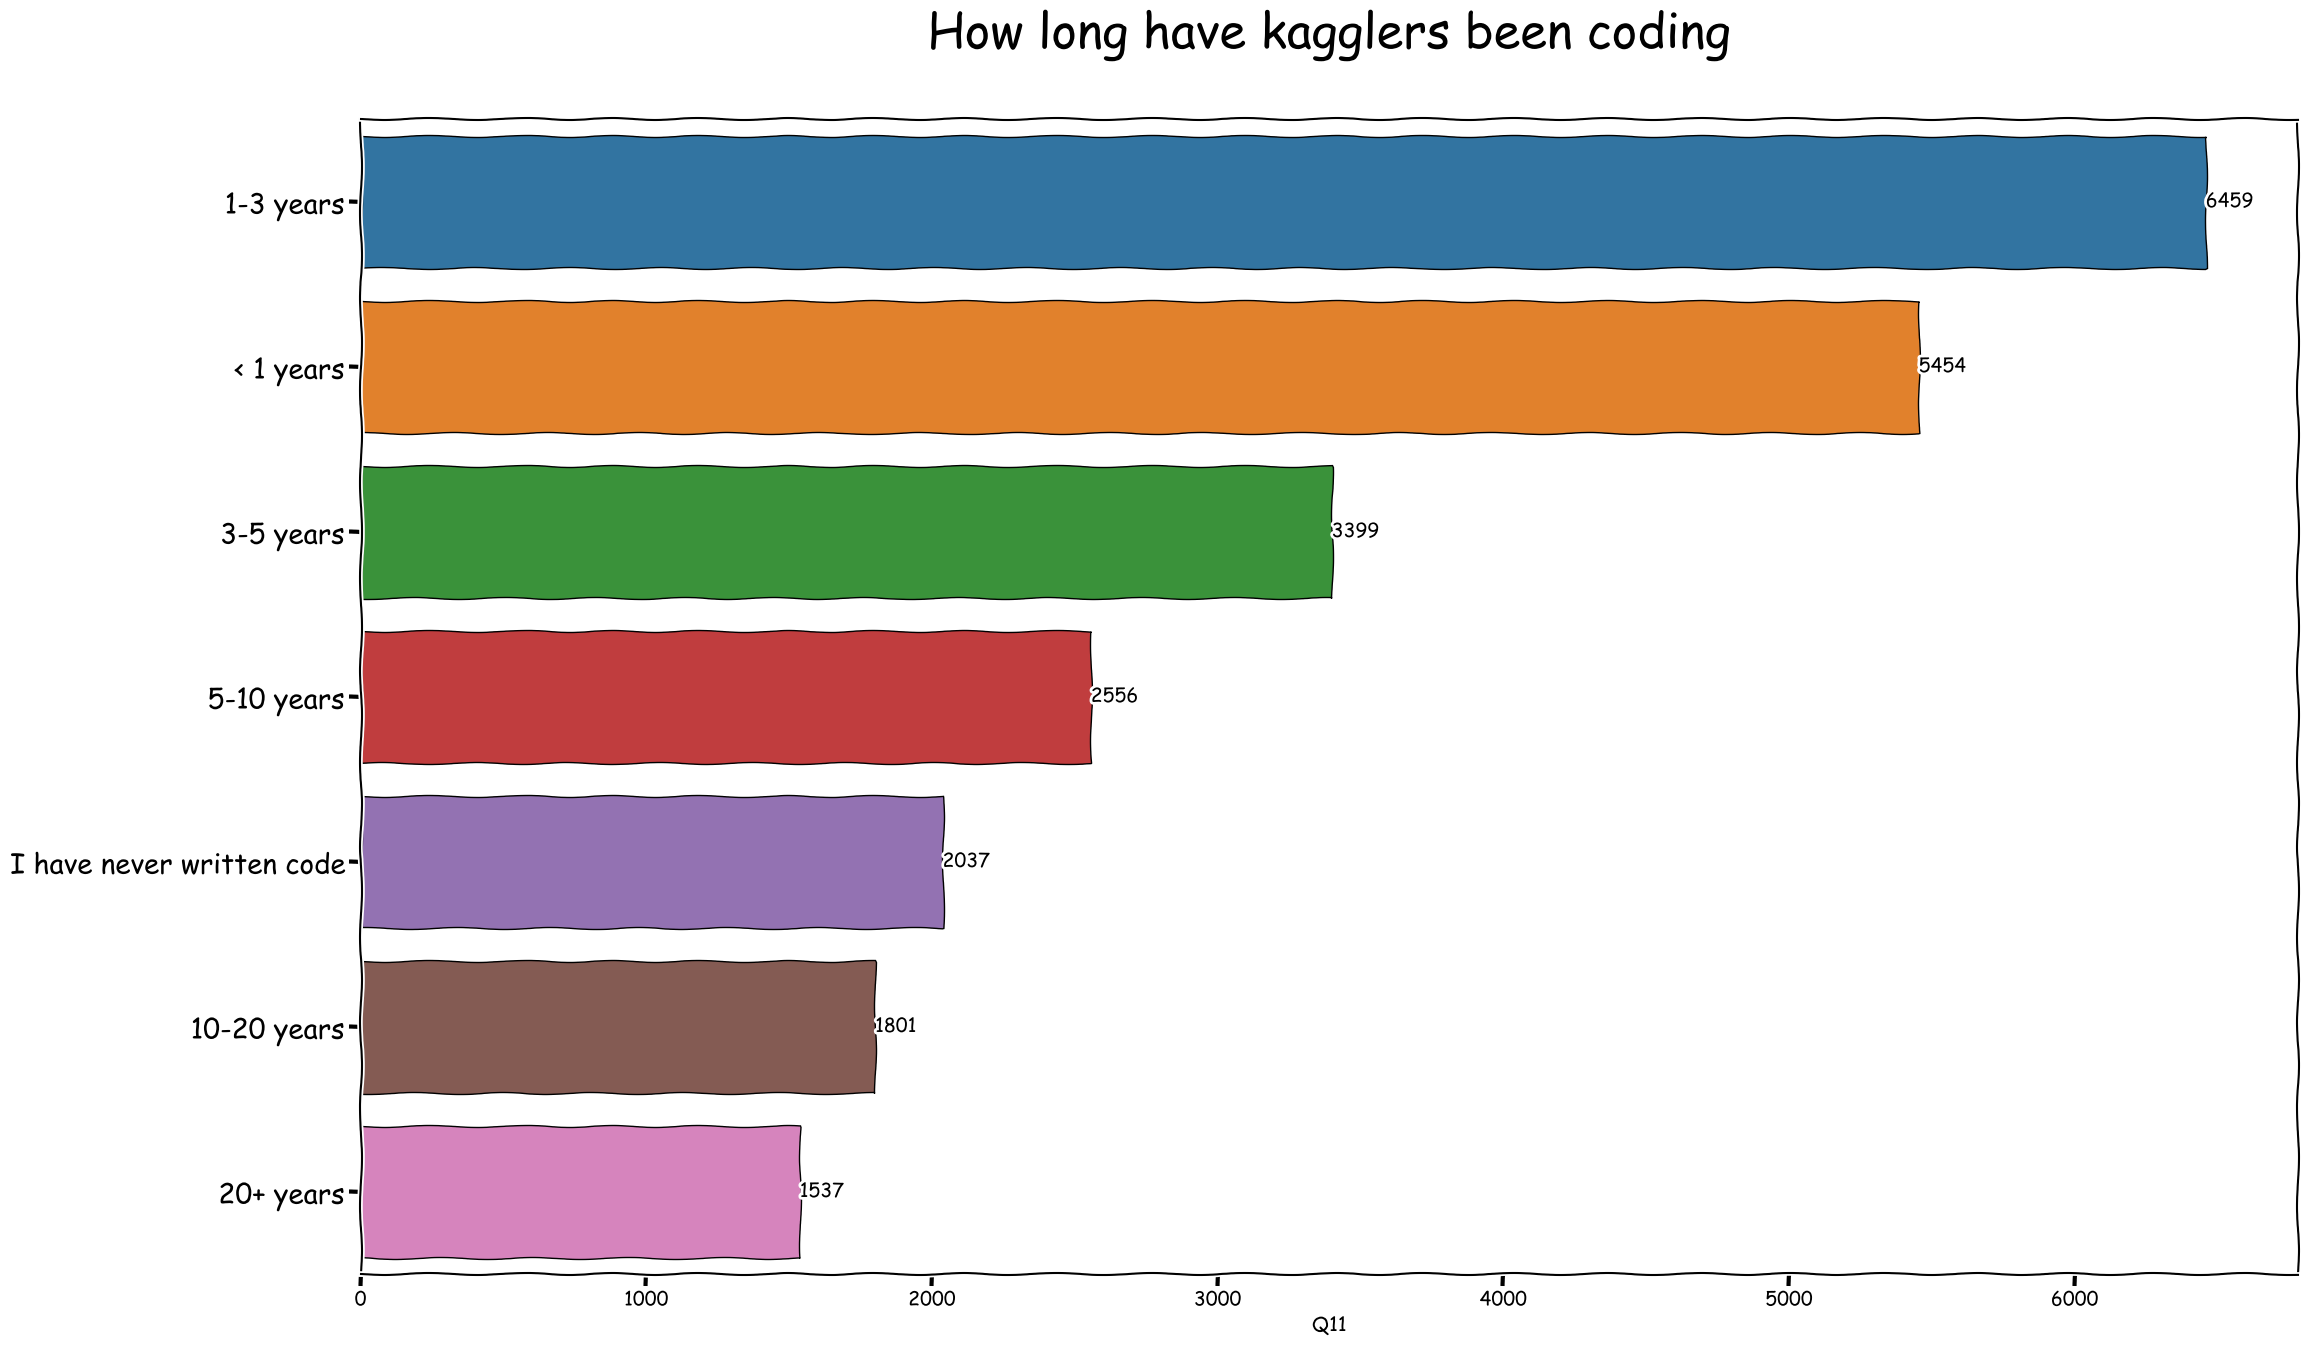

In [264]:
with plt.xkcd():
    sns.barplot(data.loc[:,'Q11'][1:].value_counts().reset_index(), x='Q11', y='index', edgecolor='black')
    fig = plt.gcf()
    fig.set_size_inches(25,15)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_size(20)
    plt.title('How long have kagglers been coding\n', size=35)

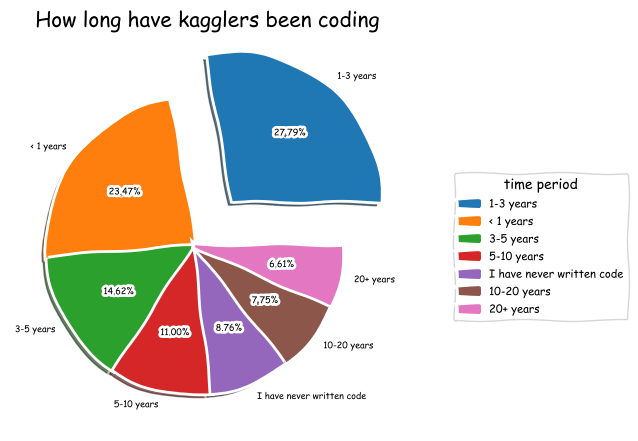

In [270]:
with plt.xkcd():
    plt.pie(data.loc[:,'Q11'][1:].value_counts().reset_index()['Q11'],labels= data.loc[:,'Q11'][1:].value_counts().reset_index()['index'],textprops={'fontsize': 6.5, 'color':'black'},shadow=True,autopct='%1.2f%%',
           explode=[0.4,0,0,0,0,0,0,])
    plt.legend(fontsize=8, loc = [1.2,0.3], title='time period',title_fontsize=10 )
    plt.title('How long have kagglers been coding\n', size=15,loc='right')

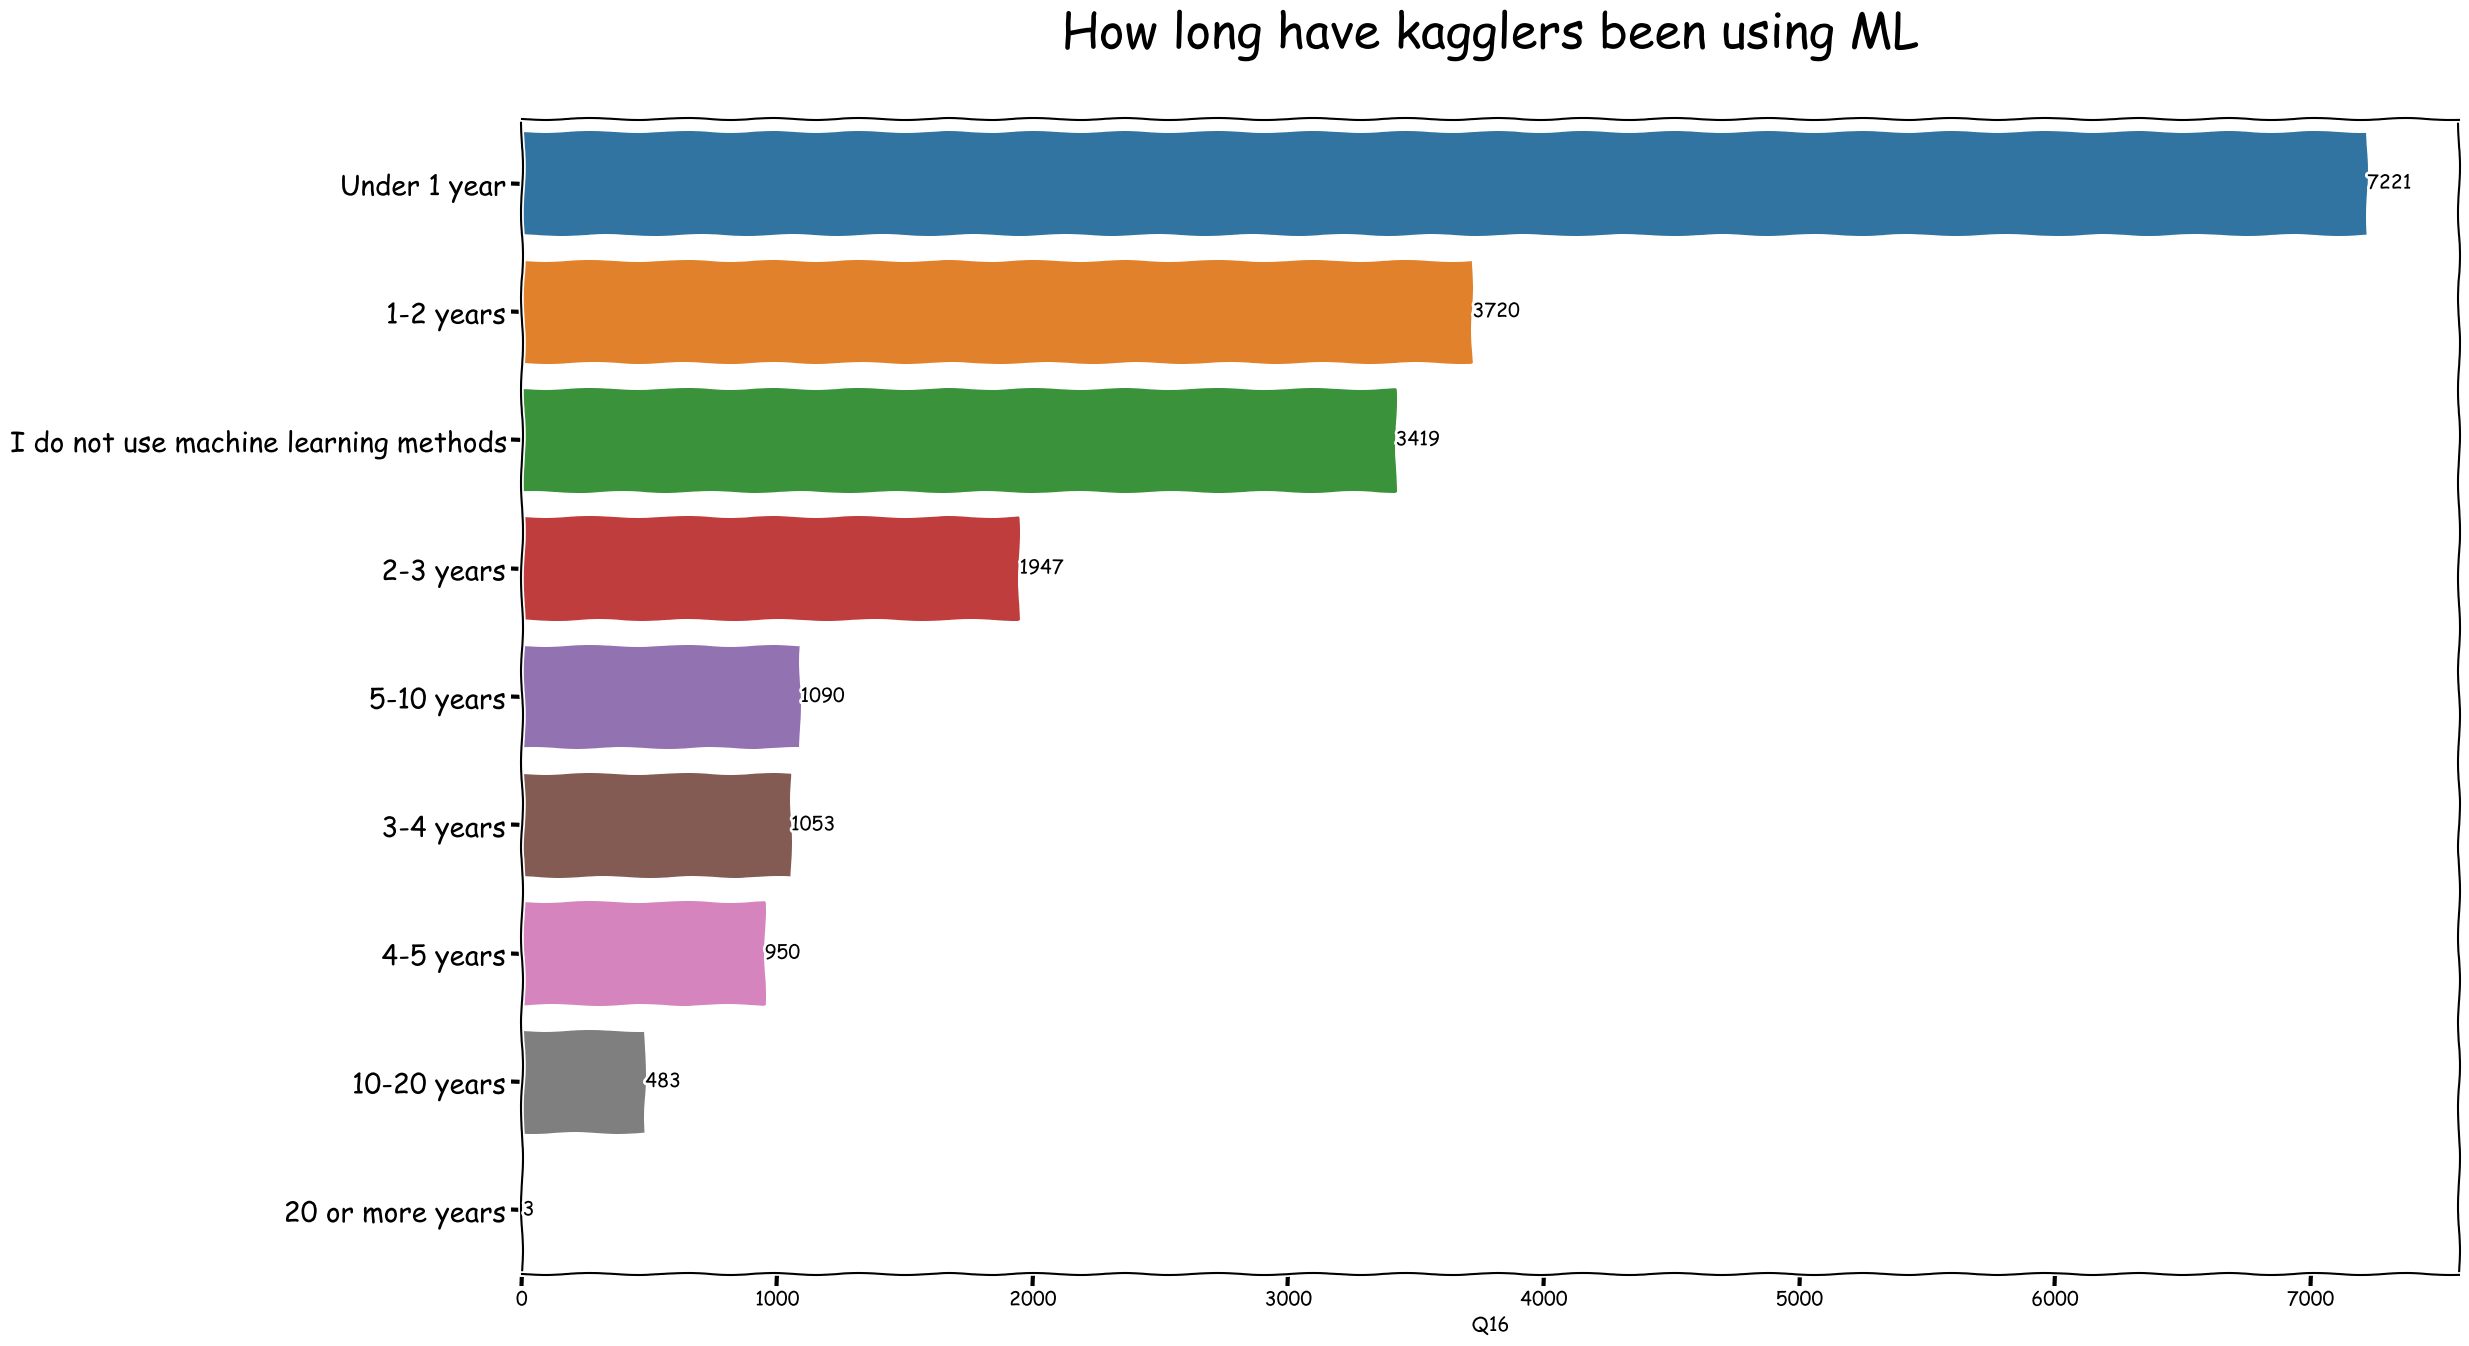

In [353]:
with plt.xkcd():
    sns.barplot(data.loc[:,'Q16'][1:].value_counts().reset_index(), x='Q16', y='index')
    fig = plt.gcf()
    fig.set_size_inches(25,15)
    plt.ylabel('')
    ax = plt.gca()
    for i in ax.containers:
        plt.bar_label(i)
    for j in ax.get_yticklabels():
        j.set_size(20)
    plt.title('How long have kagglers been using ML\n', size=35)

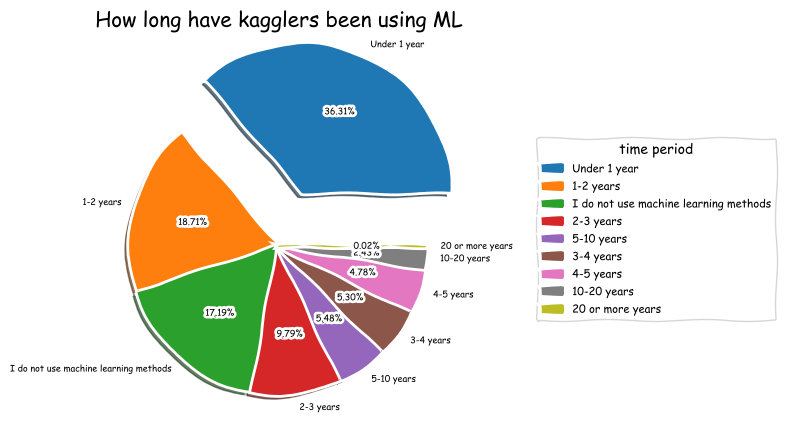

In [359]:
with plt.xkcd():
    plt.pie(data.loc[:,'Q16'][1:].value_counts().reset_index()['Q16'],labels= data.loc[:,'Q16'][1:].value_counts().reset_index()['index'],textprops={'fontsize': 6.5, 'color':'black'},shadow=True,autopct='%1.2f%%',
           explode=[0.4,0,0,0,0,0,0,0,0])
    plt.legend(fontsize=8, loc = [1.2,0.3], title='time period',title_fontsize=10 )
    plt.title('How long have kagglers been using ML\n', size=15,loc='right')

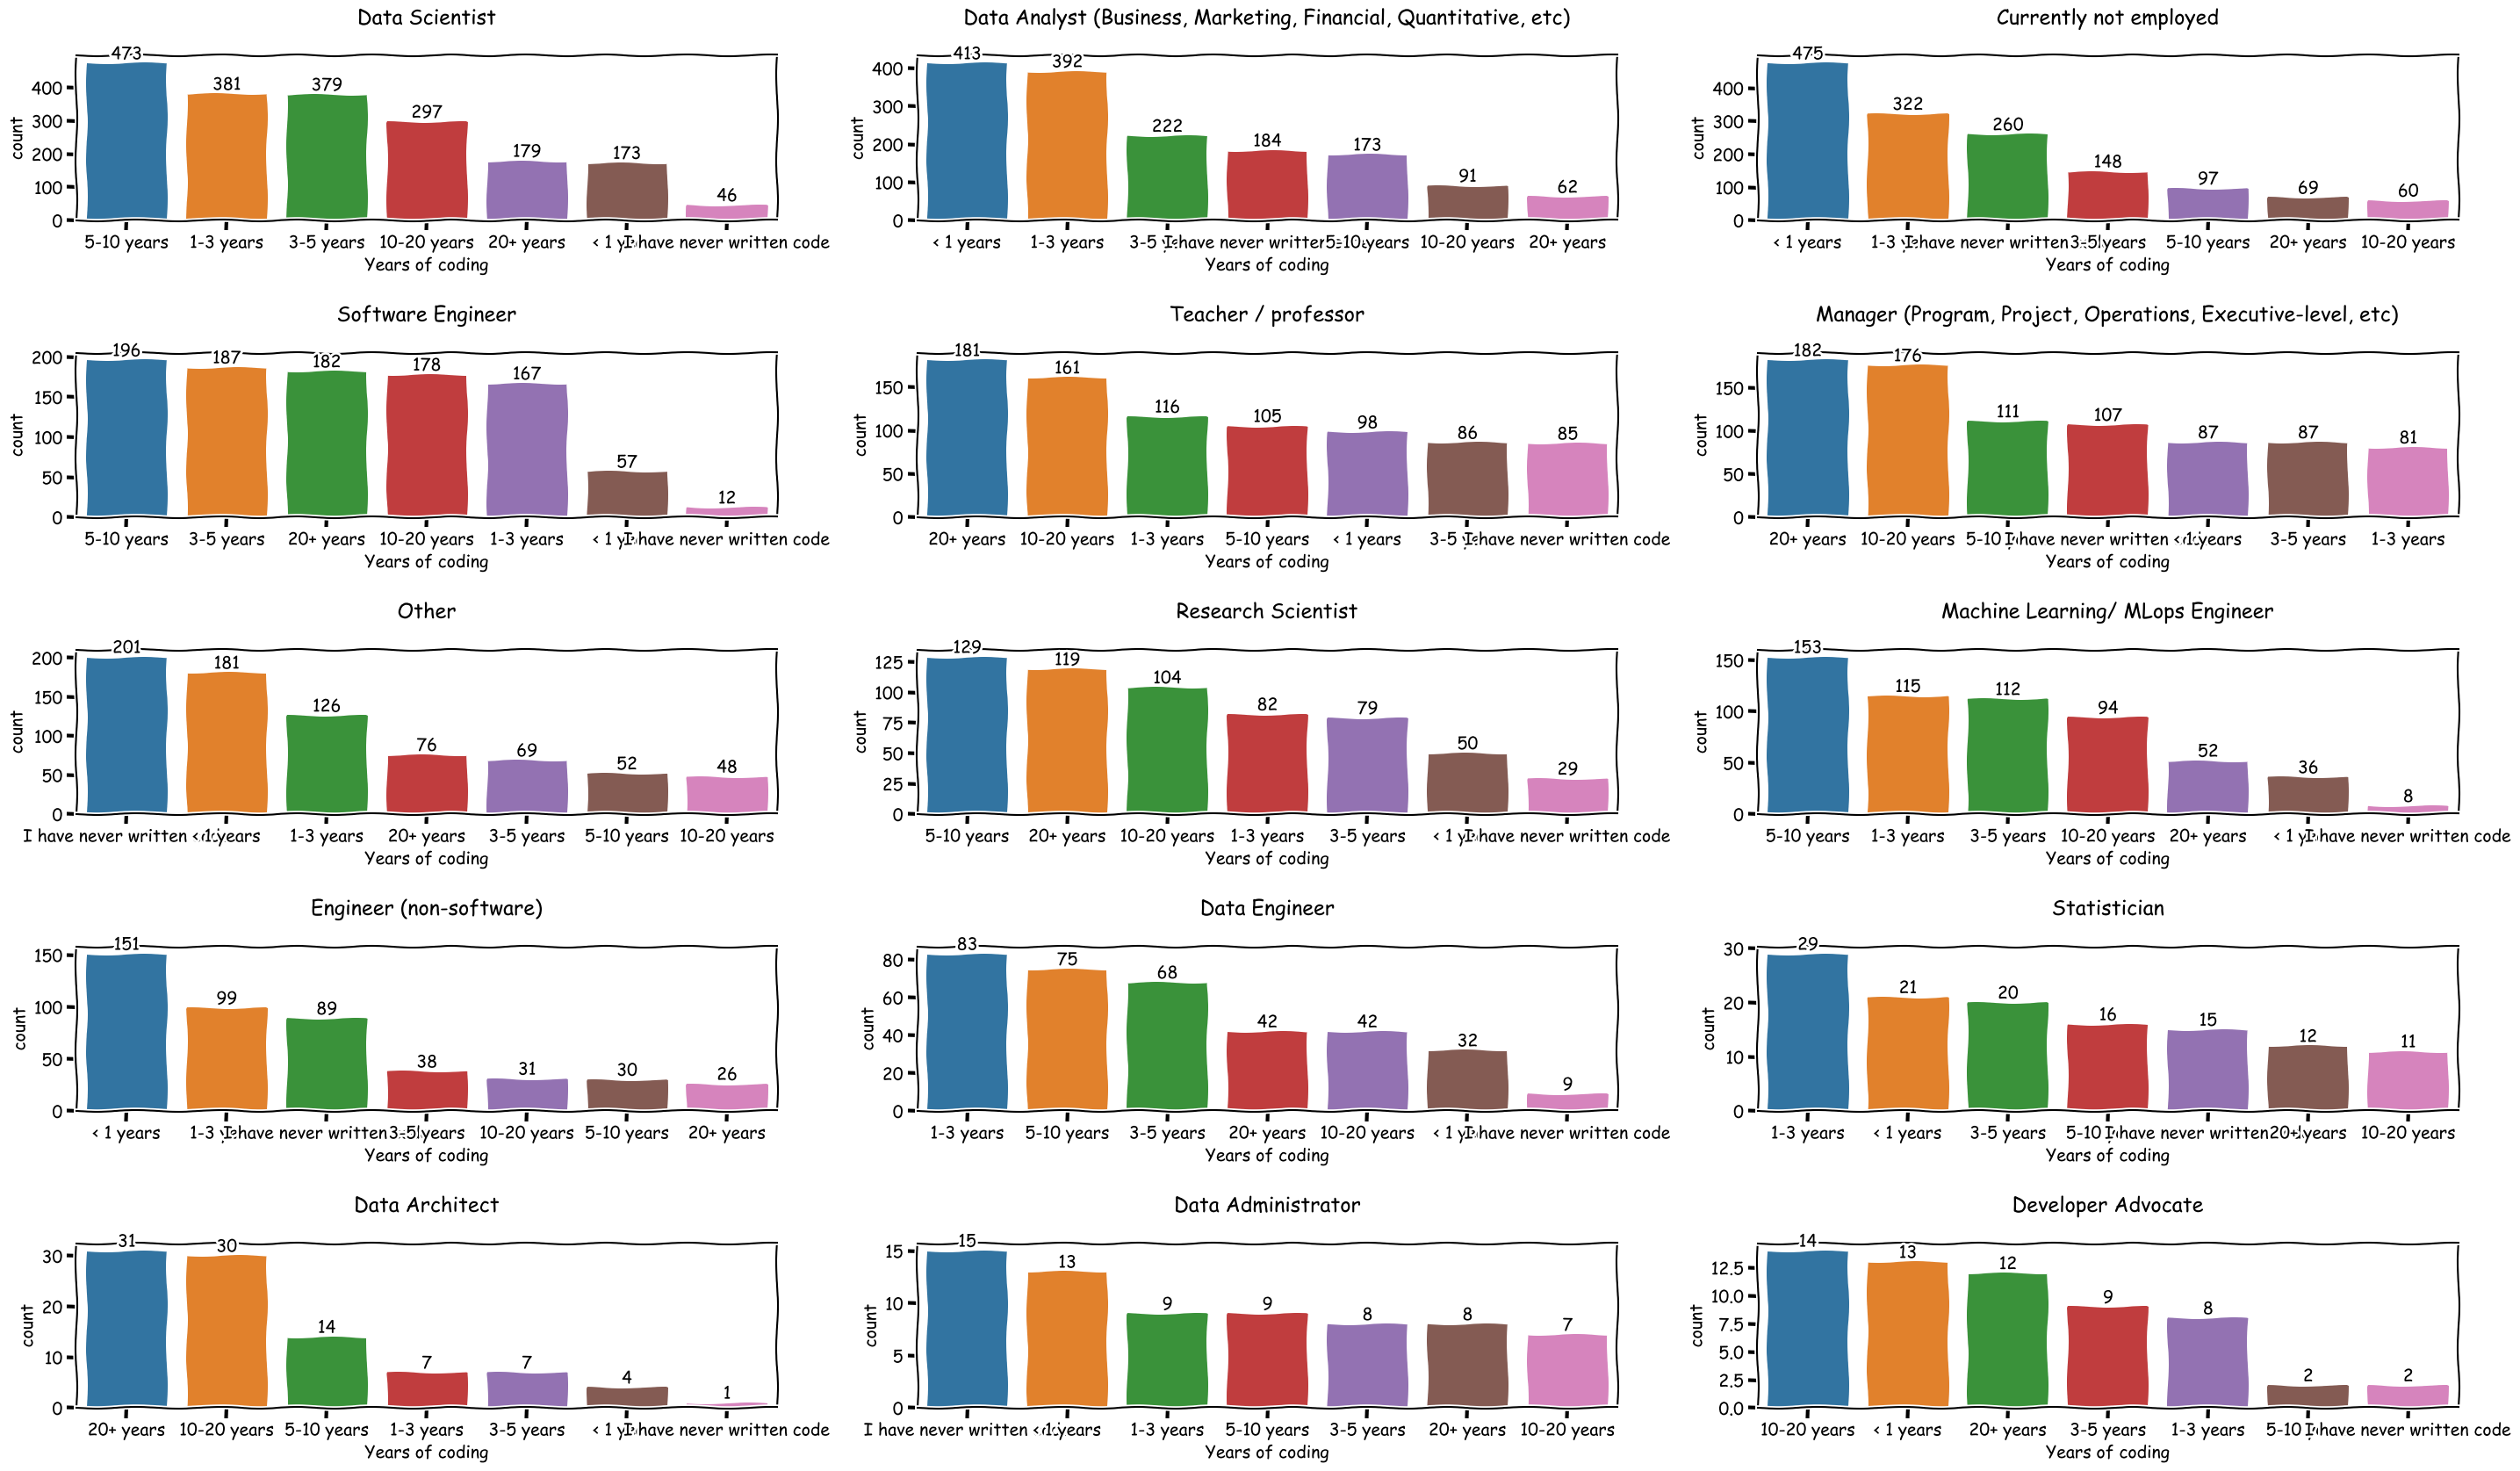

In [357]:
with plt.xkcd():
    fig, axes = plt.subplots(5, 3, figsize=(35,20), gridspec_kw=dict(hspace=0.8, wspace=0.2))
    index = data.loc[:,'Q23'][1:].value_counts().reset_index()['index']
    for i, ax in enumerate(axes.flat):
        sns.barplot(data[data['Q23']==index[i]].loc[:,'Q11'][1:].value_counts().reset_index(),x='index',y='Q11', ax=ax)
        ax.set_ylabel('count')
        ax.set_xlabel('Years of coding')
        ax.set_title(index[i]+'\n')
        for j in ax.containers:
            ax.bar_label(j)